# Heart attack prediction

## Exploratory Data Analysis

We start with exploratory data analysis to understand the data that we are working with, but first we will need to import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's import the dataset and see the columns and their data types

In [2]:
heart = pd.read_csv("Data/heart.csv")
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We can see that we have 303 entries and they are all non-null, so we have no missing data.

Let's check for duplicates and drop them.

In [3]:
heart = heart.drop_duplicates()
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


There was just one duplicate, and we have dropped it.

We can now start with data visualisation and we will figure out if data needs more cleaning or pre-processing like normalisation.

### Data Visualisation

Let's plot one by one every column to see if we can find some interesting correlation between a column and the probability of having an heart attack.

Text(0, 0.5, 'Count')

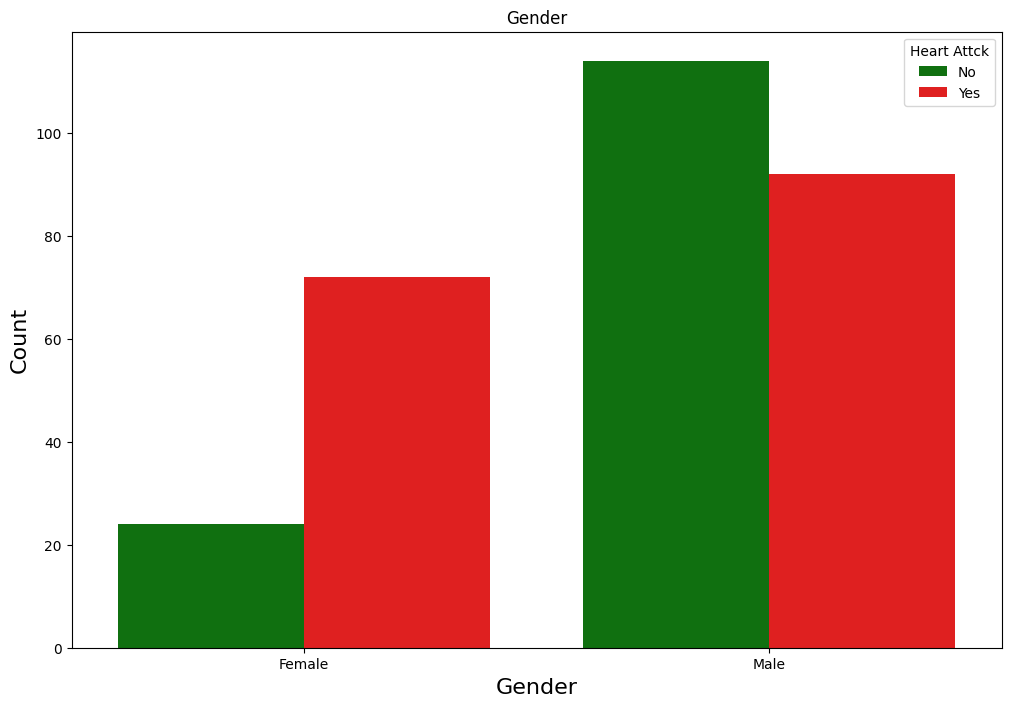

In [4]:
plt.figure(figsize=(12,8))
gender = sns.countplot(data = heart, x="sex",hue="output",palette=sns.color_palette(['green', 'red']))
gender.set(xticklabels=["Female", "Male"])
plt.legend(title='Heart Attck', loc='upper right', labels=['No', 'Yes'])
plt.title("Gender")
plt.xlabel("Gender",size=16)
plt.ylabel("Count",size=16)
#Save Figure in Pictures/DataVisualisation
#Fare il rapporto tra le persone con attacco cardiaco divisi tra generi